# AirBnB Toronto Data

In this notebook we will explore AirBnB's listings data in Toronto.

We will start with importing some visualization libraries and the library file containing the code which acommpanies this demo notebook.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import lib as airbnb
import numpy as np

%matplotlib inline

data = airbnb.load_data(path='./data/toronto-listings-2018-10.csv')
summary_data = airbnb.load_data(path='./data/toronto-listings-summary-2018-10.csv')

print("Data Shape:", data.shape)

summary_data.head()

Data Shape: (17343, 95)


/home/fizzler/anaconda3/envs/dsnd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
id,,,,,,,,,,,,,,,,,
1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.6461676615568,-79.4245101278309,Entire home/apt,469,4,7,2017-12-04,0.18,1,0.0,NaN,NaN
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.6410512698272,-79.3762770057779,Private room,97,180,170,2013-08-27,1.53,2,365.0,NaN,NaN
10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.6701855037018,-79.3358478358527,Private room,69,1,77,2016-08-18,0.7,1,355.0,NaN,NaN
12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.6672406861034,-79.4159775610911,Private room,65,1,0,NaN,NaN,1,0.0,NaN,NaN
23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.6960167412772,-79.4546827470826,Private room,70,1,201,2018-07-02,1.98,2,346.0,NaN,NaN


## Look At The Data

Let's have a look at the data available in the dataset.

Here are the steps we'll follow for inspecting the data:

1. We'll view what features are available in the dataset
2. We'll check missing values in each column
3. We'll drop some columns and move forward with the rest
4. We'll define a list of categorical columns

In [2]:
# Inspecting the columns
data.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedr

In [3]:
# Some of the columns with valuable data (i.e. data that can give us answers to our questions)
keep_cols = [
    "price", "neighbourhood_cleansed", "room_type", "bedrooms", "bed_type", "maximum_nights", "beds", 
    "property_type", "amenities", "number_of_reviews", "minimum_nights",
    "cleaning_fee", "instant_bookable",
    "review_scores_rating", "reviews_per_month", "require_guest_phone_verification", "host_is_superhost",
    "host_response_rate"
]

# Define the categorical columns which will need dummy vars before modeling
cat_cols = ['property_type', 'bed_type', 'neighbourhood_cleansed', 'room_type']

data = data[keep_cols]

# columns with more than 15% missing data
cols_missing_some_data_15 = set(data.columns[data.isnull().mean() > 0.15])

# columns with more than 25% missing data
cols_missing_some_data_25 = set(data.columns[data.isnull().mean() > 0.25])

# columns with more than 50% missing data
cols_missing_lots_data = set(data.columns[data.isnull().mean() > 0.50])

print("Missing more than 15%", cols_missing_some_data_15)
print("Missing more than 25%", cols_missing_some_data_25)
print("Missing more than 50%", cols_missing_lots_data)

Missing more than 15% {'host_response_rate', 'reviews_per_month', 'cleaning_fee', 'review_scores_rating'}
Missing more than 25% {'host_response_rate'}
Missing more than 50% set()


In [4]:
# Show a sample of the new df with less features
data.sample(25)

,price,neighbourhood_cleansed,room_type,bedrooms,bed_type,maximum_nights,beds,property_type,amenities,number_of_reviews,minimum_nights,cleaning_fee,instant_bookable,review_scores_rating,reviews_per_month,require_guest_phone_verification,host_is_superhost,host_response_rate
id,,,,,,,,,,,,,,,,,,
19491095,$198.00,Willowdale East,Entire home/apt,2.0,Real Bed,365,2.0,Condominium,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",15,2,$89.00,f,99.0,1.66,f,t,100%
4596950,$120.00,Waterfront Communities-The Island,Entire home/apt,1.0,Real Bed,1125,1.0,Apartment,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0,1,NaN,f,NaN,NaN,f,f,NaN
23392937,$175.00,Willowdale East,Entire home/apt,2.0,Real Bed,1124,2.0,Condominium,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",0,30,NaN,f,NaN,NaN,f,f,56%
14915775,$45.00,Clairlea-Birchmount,Private room,1.0,Real Bed,30,1.0,House,"{Wifi,""Air conditioning"",""Free parking on prem...",12,5,$0.00,f,98.0,0.49,f,f,100%
23613309,$178.00,Waterfront Communities-The Island,Entire home/apt,1.0,Real Bed,1125,1.0,Condominium,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",5,2,$45.00,f,84.0,0.74,f,f,100%
26891345,$206.00,Waterfront Communities-The Island,Entire home/apt,2.0,Real Bed,1125,3.0,Condominium,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",11,1,$85.00,t,95.0,5.41,f,f,NaN
21530395,$35.00,Agincourt South-Malvern West,Private room,1.0,Real Bed,1125,1.0,Guest suite,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1,1,$6.00,t,100.0,0.09,f,f,NaN
1045585,$69.00,South Parkdale,Private room,1.0,Real Bed,730,1.0,Apartment,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",30,2,NaN,f,92.0,0.46,f,f,NaN
22295000,$100.00,Willowdale East,Private room,2.0,Real Bed,1125,3.0,Bungalow,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",21,1,$40.00,f,95.0,2.36,f,t,100%


## Cleaning The Data

The next important step is to clean the data in order for us to be able to derive to statistical information from it with models.

Here are the steps taken when cleaning the data:
1. Convert numerical columns which are currently in string formations (ex: price, cleaning_fee)
2. Convert categorical columns into multiple columns of 0 and 1 signals. We do this to turn our categorical data into numeric signals which are procossed by our statistical models. 
3. Remove outliers (listings priced more than 3x standard deviation)
4. Fill missing values with the mean


### Categorical Data 

We have to deal with categorical data in special ways in order to achieve our goal of create a price prediction model.

To do this, we have to create what we refer to as "dummy variables". These variables help us achieve the desired data format for our models to ingest and learn from the data correctly.

__What are dummy variables?__

Dummy variables are numerical data points created for each categorial column when using regression analysis.

Consider a case when we have a column such as `Property Type`. From the perspective of the model, these different strings (text) that we use for each category has no value (no numerical value).

To create dummy variables for the `Property Type` column, we would transform each unique category into a column and fill that column with values of 0 and 1 to depict if a certain row (listing) belongs to that category type. This helps the model distinguish between these categorial in a numerical way.


__What about columns with lists of categories?__

In the case of `Amenities`, we actually have a set of values (a list of categories). To deal with this, we follow the same approach described above, however, each row (listing) will have multiple columns with the assigned value of 1. 

For example, if a listing has both "WiFi" and "Laundry", then each of those categories will have a column depicting if the listing has that amenity available and it is possible that we assign the value 1 to both. 

This is achieved with a Multi-Label Binarizer from Scikit Learn.

In [5]:
df = airbnb.clean(data, cat_cols=cat_cols)
df.describe()

,price,bedrooms,maximum_nights,beds,number_of_reviews,minimum_nights,cleaning_fee,instant_bookable,review_scores_rating,reviews_per_month,...,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,room_type_Private room,room_type_Shared room
count,17189.000000,17189.000000,1.718900e+04,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,...,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.000000,17189.00000,17189.000000,17189.000000
mean,131.435395,1.294898,1.846134e+05,1.651386,24.603991,6.262144,56.735520,0.342137,94.312566,2.036910,...,0.002443,0.005410,0.002502,0.006050,0.005876,0.004189,0.008436,0.00512,0.335040,0.017628
std,100.731593,0.840011,1.806824e+07,1.058300,42.170835,28.103799,39.981739,0.474439,7.026060,2.014011,...,0.049372,0.073359,0.049955,0.077551,0.076431,0.064587,0.091460,0.07137,0.472018,0.131597
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,65.000000,1.000000,3.100000e+01,1.000000,2.000000,1.000000,30.000000,0.000000,93.000000,0.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,100.000000,1.000000,1.125000e+03,1.000000,8.000000,2.000000,56.735520,0.000000,95.000000,1.740000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,160.000000,2.000000,1.125000e+03,2.000000,28.000000,3.000000,70.000000,1.000000,99.000000,2.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,727.000000,30.000000,2.147484e+09,30.000000,620.000000,1125.000000,879.000000,1.000000,100.000000,16.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Visualizationing The Data

Let's visualize some of the potential trends in the data after cleaning it.

### Correlation Matrix

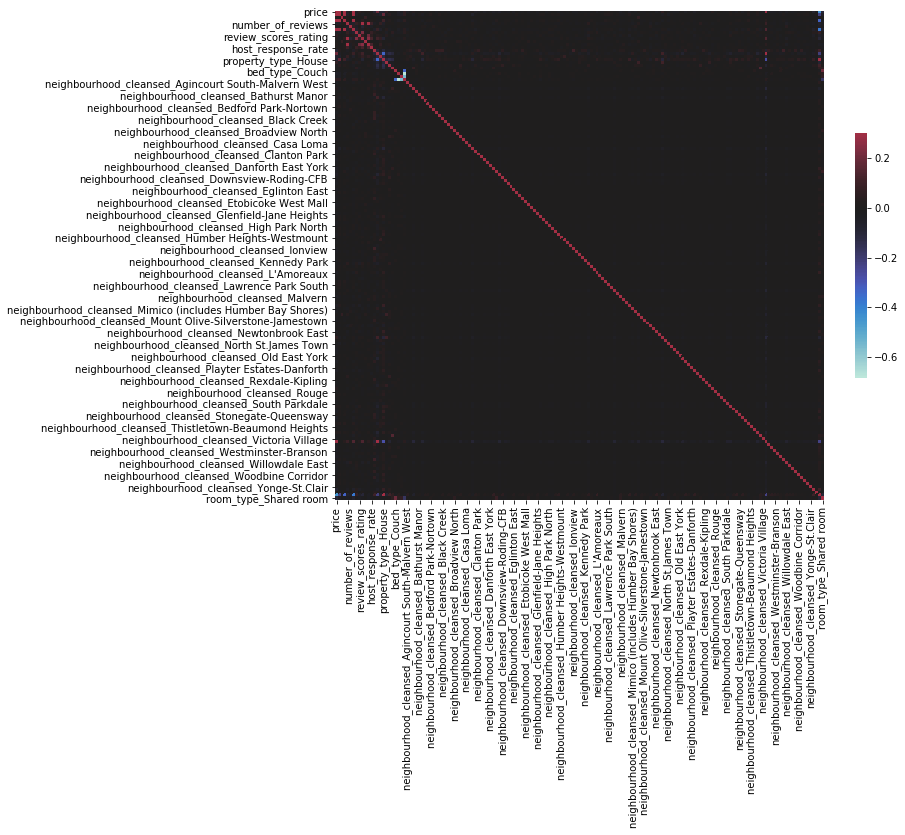

In [6]:
def condition(c):
    return c not in ['longitude', 'latitude'] and \
    'amenities' not in c

corr = df[[c for c in df.columns if condition(c)]].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0, square=True, cbar_kws={"shrink": .5}, ax=ax)

### Price Distribution

/home/fizzler/anaconda3/envs/dsnd/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


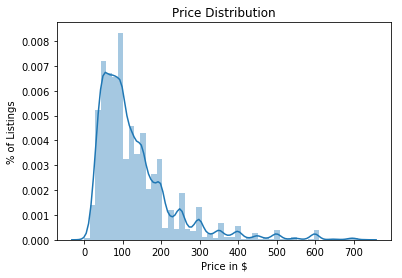

In [7]:
ax = sns.distplot(df.price)
ax.set(xlabel='Price in $', ylabel='% of Listings')
plt.title('Price Distribution')
plt.show()

## Answering Questions

Below we will pose a few questions about the dataset and will visualize the results as well as list them in tabular formats.

The questions will revolve around neighbourhoods and types of properties.


### Q1. Which neighbourhoods have the "Highest Listing Prices" & "Highest Price per Bed"?

In [8]:
clean_df = airbnb.clean(data, include_dummies=False)

# assume 1 bed if the place has 0 beds (e.g. sofa bed)
clean_df['beds'] = clean_df['beds'].mask(clean_df['beds'] == 0, 1)
clean_df['price_per_bed'] = clean_df.price / clean_df.beds

grouped_by_hood = clean_df.groupby('neighbourhood_cleansed')
hood_mean = grouped_by_hood.mean()[['price', 'price_per_bed']]

,price,price_per_bed
neighbourhood_cleansed,,
Waterfront Communities-The Island,191.83,124.82
Rosedale-Moore Park,174.61,117.98
Lawrence Park South,168.72,79.51
Bridle Path-Sunnybrook-York Mills,166.33,114.02
Lawrence Park North,164.93,68.55
Kingsway South,160.64,81.35
Leaside-Bennington,160.53,78.06
Niagara,158.23,114.29
The Beaches,157.19,84.27


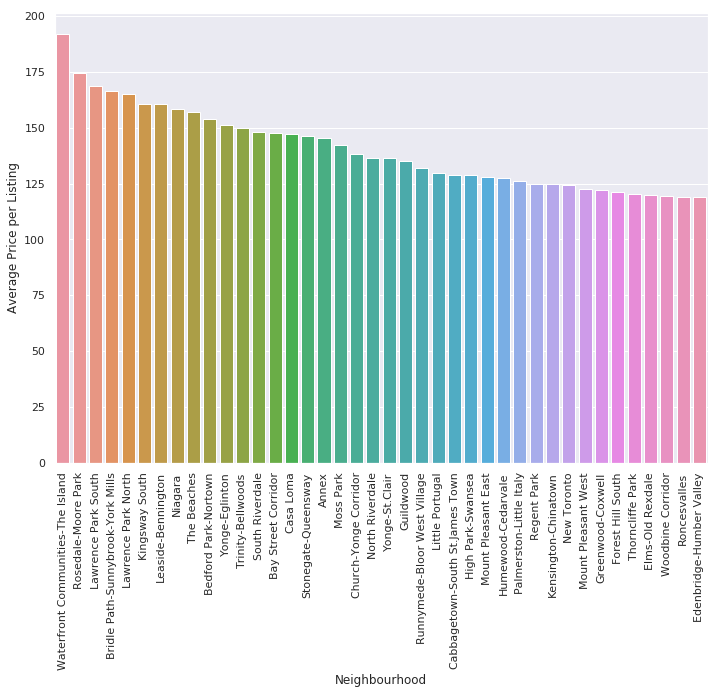

In [9]:
# Neighbourhood with highest rates
price_sorted = hood_mean.sort_values(by=['price'], ascending=False).round(2).head(40)

sns.set(rc={'figure.figsize':(11.7,8.27)})

display(price_sorted.head(10))

price_graph = sns.barplot(x=price_sorted.index, y=price_sorted.price)
price_graph.set_xticklabels(labels=price_graph.get_xticklabels(), rotation=90);
price_graph.set_xlabel('Neighbourhood');
price_graph.set_ylabel('Average Price per Listing');

,price,price_per_bed
neighbourhood_cleansed,,
Waterfront Communities-The Island,191.83,124.82
Rosedale-Moore Park,174.61,117.98
Niagara,158.23,114.29
Bridle Path-Sunnybrook-York Mills,166.33,114.02
Bay Street Corridor,147.45,107.66
Church-Yonge Corridor,138.16,104.60
Markland Wood,115.80,104.30
Annex,145.63,103.95
Thorncliffe Park,120.35,99.63


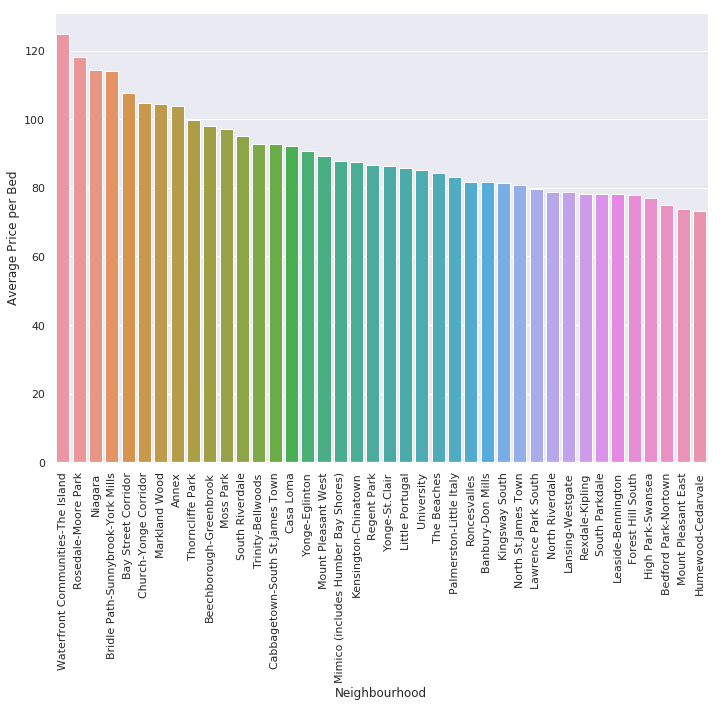

In [10]:
price_per_bed_sorted = hood_mean.sort_values(by=['price_per_bed'], ascending=False).round(2).head(40)

display(price_per_bed_sorted.head(10))

price_per_bed_sorted_graph = sns.barplot(x=price_per_bed_sorted.index, y=price_per_bed_sorted.price_per_bed)
price_per_bed_sorted_graph.set_xticklabels(labels=price_per_bed_sorted_graph.get_xticklabels(), rotation=90);
price_per_bed_sorted_graph.set_xlabel('Neighbourhood');
price_per_bed_sorted_graph.set_ylabel('Average Price per Bed');

### Q2. Which property types are the most common in Toronto?

Apartment             33.643609
House                 26.429693
Condominium           23.224155
Townhouse              4.811216
Guest suite            3.368433
Bungalow               2.676130
Loft                   2.489965
Serviced apartment     1.116993
Guesthouse             0.529408
Bed and breakfast      0.523591
Name: property_type, dtype: float64

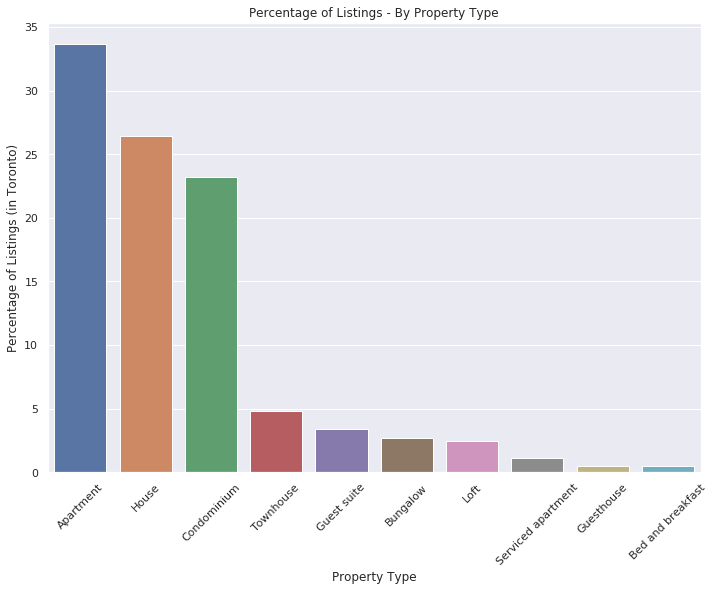

In [11]:
property_type_counts = (clean_df['property_type'].value_counts() / clean_df.shape[0]) * 100

property_types_sorted = property_type_counts.sort_values(ascending=False).head(10)

display(property_types_sorted)

property_types_graph = sns.barplot(x=property_types_sorted.index, y=property_types_sorted)
property_types_graph.set_xticklabels(labels=property_types_graph.get_xticklabels(), rotation=45);
property_types_graph.set_title('Percentage of Listings - By Property Type')
property_types_graph.set_xlabel('Property Type');
property_types_graph.set_ylabel('Percentage of Listings (in Toronto)');

### Q3. Which property types are the most expensive in Toronto?

,price,price_per_bed
property_type,,
Aparthotel,305.00,305.00
Earth house,277.00,21.60
Casa particular (Cuba),210.00,210.00
Serviced apartment,197.40,118.56
Cabin,188.00,102.06
Loft,176.24,128.42
Boutique hotel,176.19,167.54
Condominium,168.98,115.49
Hotel,160.00,80.00


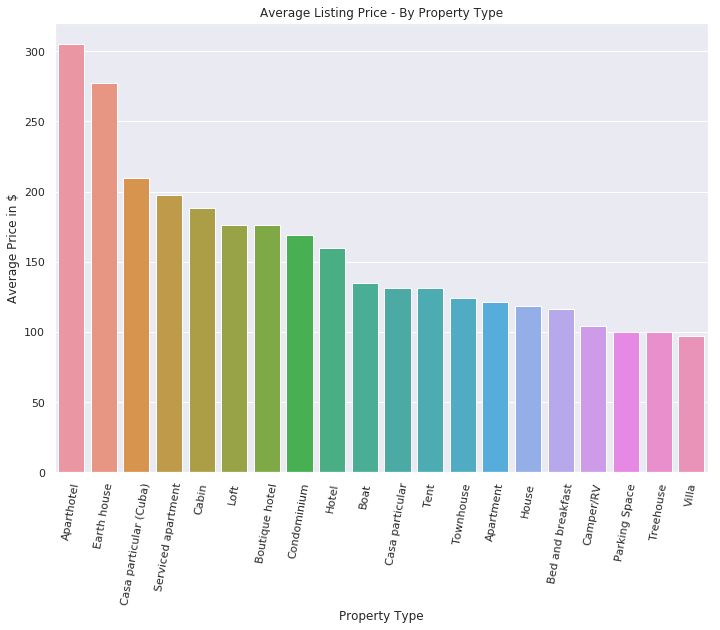

In [12]:
grouped_by_type = clean_df.groupby('property_type')
type_mean = grouped_by_type.mean()[['price', 'price_per_bed']]

price_by_type_sorted = type_mean.sort_values(by=['price'], ascending=False).round(2).head(20)

display(price_by_type_sorted.head(20))

price_by_type_sorted_graph = sns.barplot(x=price_by_type_sorted.index, y=price_by_type_sorted.price)
price_by_type_sorted_graph.set_xticklabels(labels=price_by_type_sorted_graph.get_xticklabels(), rotation=80);
price_by_type_sorted_graph.set_title('Average Listing Price - By Property Type')
price_by_type_sorted_graph.set_xlabel('Property Type');
price_by_type_sorted_graph.set_ylabel('Average Price in $');

### Q4. Which property types have the most expensive price per bed?

,price,price_per_bed
property_type,,
Aparthotel,305.00,305.00
Casa particular (Cuba),210.00,210.00
Boutique hotel,176.19,167.54
Casa particular,131.00,131.00
Tent,131.00,131.00
Loft,176.24,128.42
Serviced apartment,197.40,118.56
Condominium,168.98,115.49
Cabin,188.00,102.06


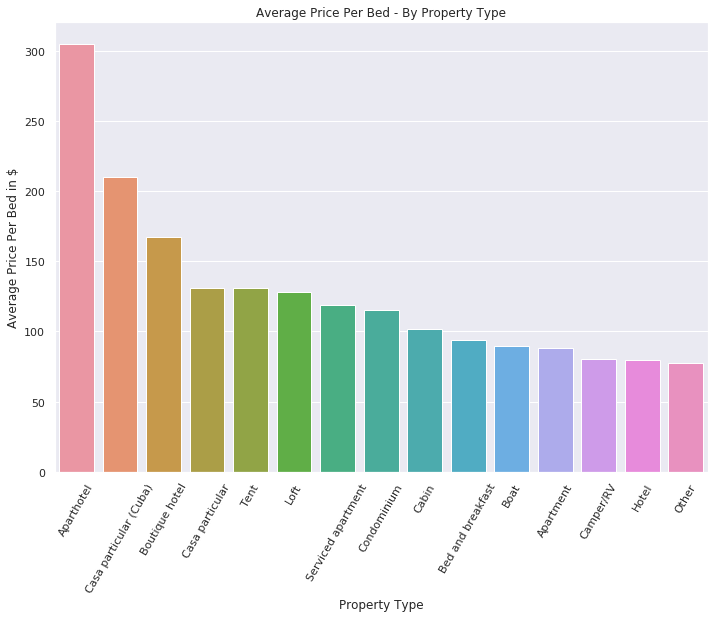

In [13]:
priceperbed_by_type_sorted = type_mean.sort_values(by=['price_per_bed'], ascending=False).round(2).head(15)

display(priceperbed_by_type_sorted.head(15))

priceperbed_by_type_graph = sns.barplot(x=priceperbed_by_type_sorted.index, y=priceperbed_by_type_sorted.price_per_bed)
priceperbed_by_type_graph.set_xticklabels(labels=priceperbed_by_type_graph.get_xticklabels(), rotation=60);
priceperbed_by_type_graph.set_title('Average Price Per Bed - By Property Type')
priceperbed_by_type_graph.set_xlabel('Property Type');
priceperbed_by_type_graph.set_ylabel('Average Price Per Bed in $');

## Modeling & Results

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
import pandas as pd

"""
A dumn model that mimics the .fit and .predict patter of sklearn classes
However, will always predict the mean value of the output column (i.e. mean price)
Used as a benchmark for other models.
"""
class NaiveModel:
    def __init__(self):
        self.mean = 0

    def fit(self, X, y):
        self.mean = np.mean(y)
    
    def predict(self, X):
        X['predictions'] = np.full(X.shape[0], fill_value=self.mean)
        return X.predictions
        

models = [
    ('NaiveModel', NaiveModel()),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=150, max_depth=9, criterion='mse')),
    ('PLSRegression', PLSRegression()),
    ('LinearRegression', LinearRegression())
]

results = pd.DataFrame(np.zeros((4,3)), index=[m[0] for m in models], columns=['train', 'validation', 'test'])

for m in models:
    print("Current building the {} model".format(m[0]))
    test_score, train_score, val_score, X_train, X_test, X_val, y_train, y_test, y_val, test_preds, val_preds = \
        airbnb.train_test(df, m[1], dummy_na=False)
    
    results.at[m[0], 'train'] = train_score
    results.at[m[0], 'validation'] = val_score
    results.at[m[0], 'test'] = test_score

    print("Training score:", train_score)
    print("Validation score:", val_score)
    print("Testing score:", test_score)
    print("---------------------\n")

display(results)

Current building the NaiveModel model


/home/fizzler/anaconda3/envs/dsnd/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Training score: 0.0
Validation score: -0.0001719807552993391
Testing score: -0.0006091544343875821
---------------------

Current building the RandomForestRegressor model
Training score: 0.7103997586335421
Validation score: 0.4915202324724447
Testing score: 0.4907004705652507
---------------------

Current building the PLSRegression model
Training score: 0.4593973522593997
Validation score: 0.4451750062807671
Testing score: 0.4328269767349914
---------------------

Current building the LinearRegression model
Training score: 0.5344619843339987
Validation score: 0.4884897953092586
Testing score: 0.4874351138597329
---------------------



,train,validation,test
NaiveModel,0.000000,-0.000172,-0.000609
RandomForestRegressor,0.710400,0.491520,0.490700
PLSRegression,0.459397,0.445175,0.432827
LinearRegression,0.534462,0.488490,0.487435
